In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('../MachineLearning/datasets/AAPL.csv')

In [8]:
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [9]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [10]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [11]:
df=df.reset_index()['close']

In [12]:
df

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

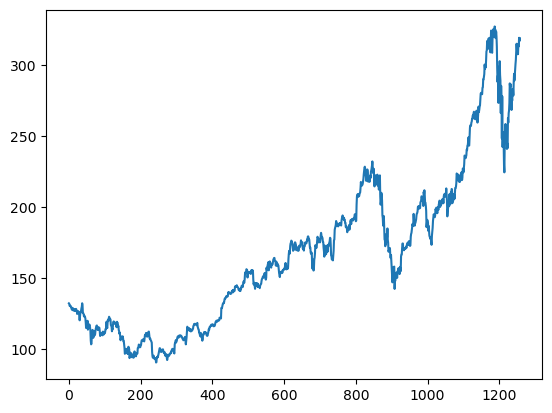

In [13]:
import matplotlib.pyplot as plt
plt.plot(df)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
df=scale.fit_transform(np.array(df).reshape(-1,1))

In [15]:
df

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [16]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [17]:
training_size,test_size

(817, 441)

In [18]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [19]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)  

In [20]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [21]:
print(x_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [22]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)   

Epoch 1/100
12/12 [==============================] - 13s 359ms/step - loss: 0.0143 - val_loss: 0.0660
Epoch 2/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0032 - val_loss: 0.0059
Epoch 3/100
12/12 [==============================] - 3s 222ms/step - loss: 9.4385e-04 - val_loss: 0.0049
Epoch 4/100
12/12 [==============================] - 2s 202ms/step - loss: 8.2825e-04 - val_loss: 0.0042
Epoch 5/100
12/12 [==============================] - 2s 197ms/step - loss: 6.7797e-04 - val_loss: 0.0047
Epoch 6/100
12/12 [==============================] - 3s 212ms/step - loss: 6.1832e-04 - val_loss: 0.0047
Epoch 7/100
12/12 [==============================] - 2s 203ms/step - loss: 6.2198e-04 - val_loss: 0.0043
Epoch 8/100
12/12 [==============================] - 2s 197ms/step - loss: 5.9936e-04 - val_loss: 0.0041
Epoch 9/100
12/12 [==============================] - 2s 208ms/step - loss: 5.8835e-04 - val_loss: 0.0040
Epoch 10/100
12/12 [==============================] - 3s 222ms

In [27]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

11/11 [==============================] - 0s 33ms/step
